In [1]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 데이터 개수
- 2016 : 25653
- 2017 : 25197
- 2018 : 25495


# 데이별터 개수
- 값이 0보다 큰 값을 가진 데이터 수 : 61924
- 결측치를 가진 데이터 수 : 388
- 0만 가진 데이터 수 : 14108
- 결측치 가진 데이터 중 0보다 큰 값을 가진 데이터 수 : 75

## 결측 72개 제거시
- 0보다 큰 데이터 수 : 61852
- 0만 있는 데이터 수 : 14108
- 총데이터 수 : 76273

- 비율 4.38 : 1

# 데이터 개수
- 0 초과 : 8203710
- 0 : 113404534
- 비율 1 : 13.82

61924 388 14108
8203710 113404534

### 결측치
- Y 데이터에 -9999.xx인 값은 결측치에 해당한다.
- 결측치가 존재하는 데이터 중 가장 작은 3개 데이터를 제외한 나머지 데이터는 0 밖에 들어 있지 않음.
- 3개 데이터 복원 후, 나머지 데이터 버림
- 3개 데이터는 0이 아닌 지역의 가운데에 위치함
- 평균값으로 처리하는 게 좋을 것 같음

- 43 + 68 = 111

In [51]:
path = os.path.join(os.getcwd(), 'data', 'total.npy')
data = np.load(path)

In [3]:
data.shape

(76068, 40, 40, 15)

In [10]:
save = [40413, 62427, 45933, 46686, 73211, 54214, 64453, 74096, 45640, 55176, 26086, 19071, 61888, 62923, 34099, 56604, 43002, 17227, 49556]

# 17546 애매함 

In [56]:
def visual_save(save):
    d = list(zip([-1,-1,0,1,1,1,0,-1], [0,1,1,1,0,-1,-1,-1]))
    figsize=(15, 15)
    size = len(save)
    
    plt.style.use('fivethirtyeight')

    for v in save:
        origin = data[v, :, :, 14]
        index = np.where(origin < 0)
        fake = np.where(origin < 0, 0, origin)
        new = np.where(origin < 0, 0, origin)

        for x, y in zip(index[0], index[1]):
            t_value = 0
            t_cnt = 0

            for dx, dy in d:
                tx = x + dx
                ty = y + dy

                if tx >=0 and tx < 40 and ty>= 0 and ty< 40:
                    t_value += new[tx][ty]
                    t_cnt += 1

            new[x][y] = t_value / t_cnt

        plt.figure(figsize=figsize)
        for i in range(9):
            plt.subplot(size, 12, i + 1)
            plt.imshow(data[v, :, :, i], cmap=color_map)

        plt.subplot(size, 12, 10)
        plt.imshow(origin, cmap=color_map)
        plt.subplot(size, 12, 11)
        plt.imshow(fake, cmap=color_map)
        plt.subplot(size, 12, 12)
        plt.imshow(new, cmap=color_map)

        plt.show()
        
        data[v, :, :, 14] = new.copy()

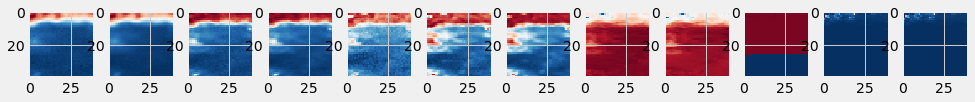

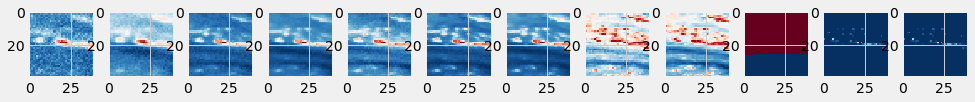

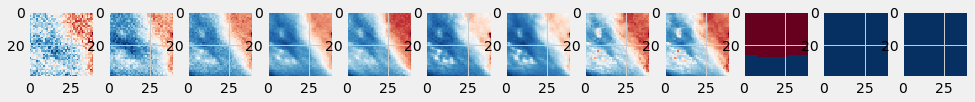

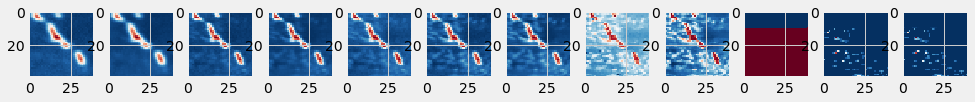

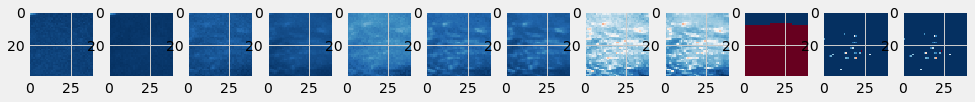

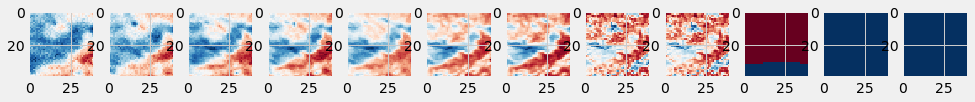

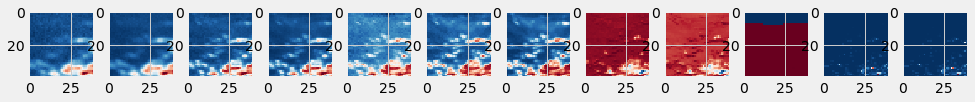

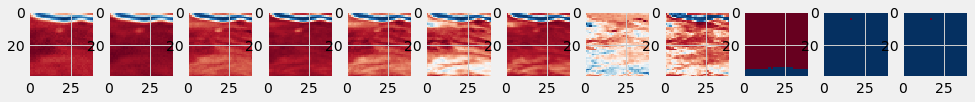

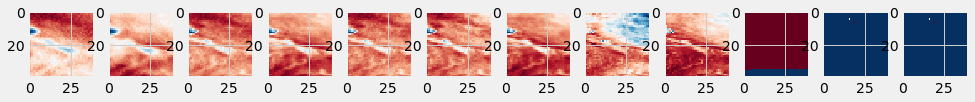

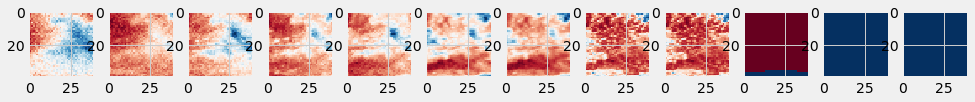

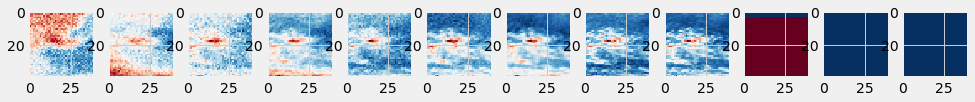

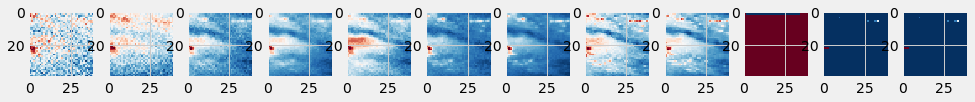

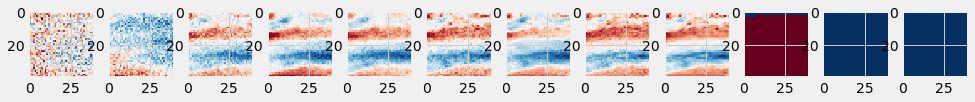

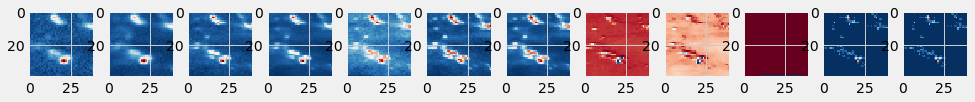

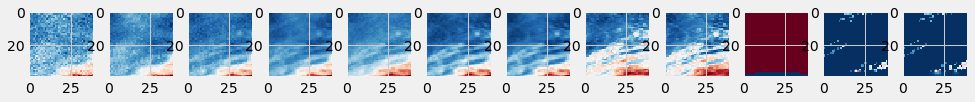

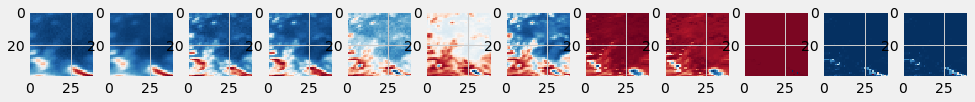

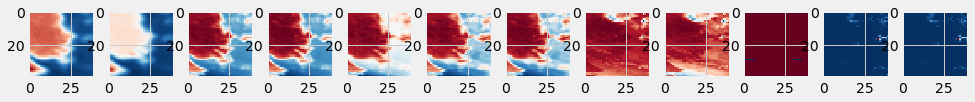

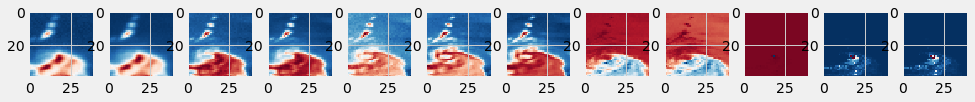

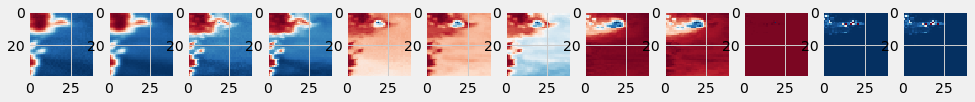

In [57]:
for i in range(0, len(save), 1):
    visual_save(save[i: i + 1])

In [58]:
for v in save:
    print((data[v, :, :, 14] < 0).sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [59]:
delete = [v for v in lower_value if v not in save] + upper_value

In [60]:
print(len(save), len(delete))
print(len(save) + len(delete))

19 92
111


In [61]:
data.shape, len(delete)

((76068, 40, 40, 15), 92)

In [62]:
data = np.delete(data, delete, axis=0)

In [63]:
data.shape

(75976, 40, 40, 15)

In [64]:
(data < 0).sum()

0

In [65]:
np.save(os.path.join(os.getcwd(), 'data', 'process.npy'), data)

In [5]:
color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()

def visual(indexs, x=None):
    size = len(indexs)
    
    for i, index in enumerate(indexs):
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(30, 30))
        
        if x is None:
            plt.subplot(size, 1, 1)
            plt.imshow(data[i, :, :, x], cmap=color_map) 
        else:
            for j in range(15):
                plt.subplot(size, 15, j + 1)
                plt.imshow(data[i, :, :, j], cmap=color_map)

    plt.show()

def visual_scatter(indexs, x=None, legend='full'):
    size = len(indexs)
    
    x_axis = [j for i in range(40) for j in range(40)]
    y_axis = [i for i in range(40) for j in range(40)]
    
    for i, index in enumerate(indexs):
        t = np.where(data[index, :, :, x] < 0, -1, 1).reshape(-1)
        sns.scatterplot(x=x_axis, y=y_axis, hue=t, \
                        legend=legend, ax=ax[i, 0])

    plt.show()

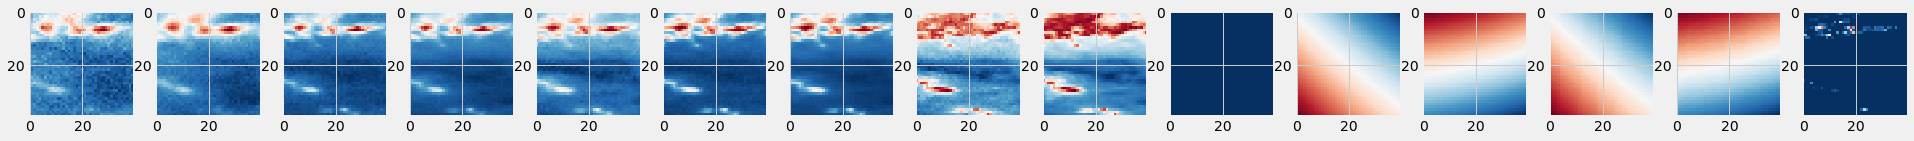

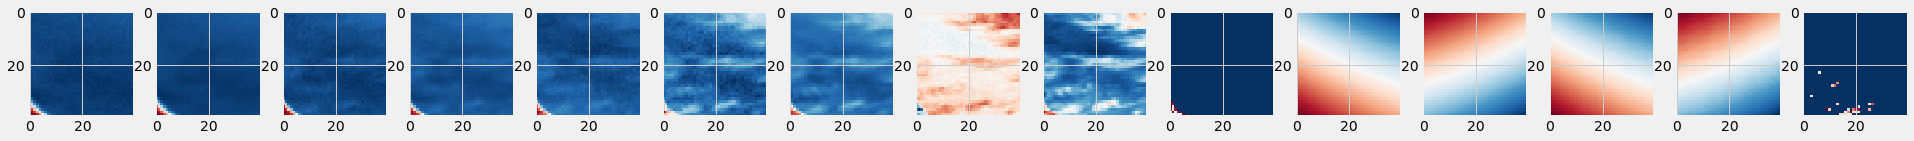

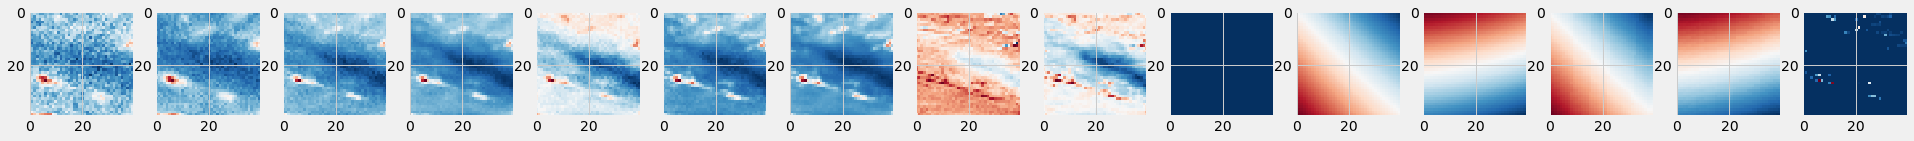

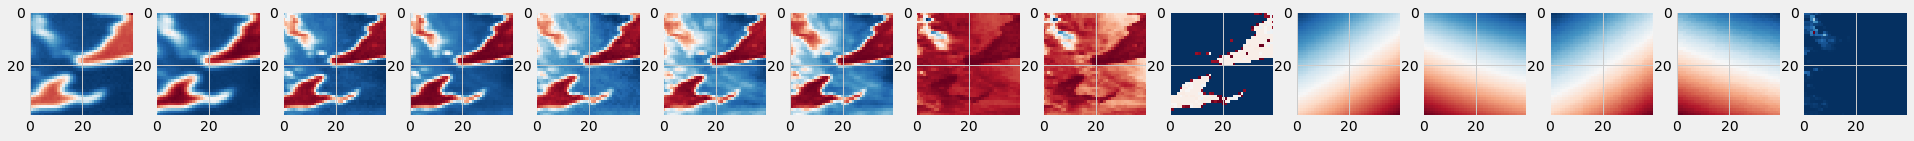

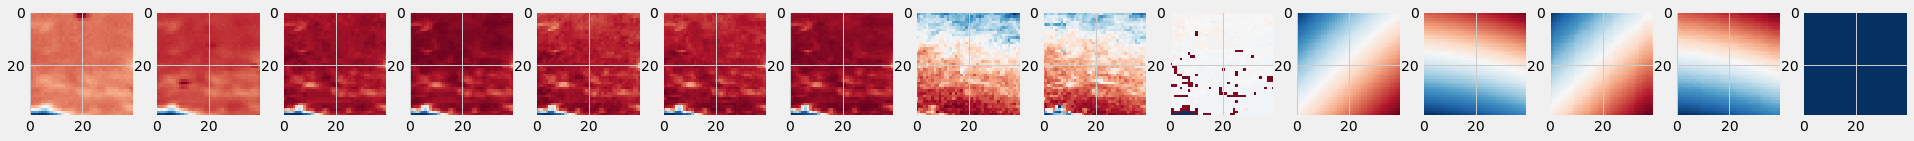

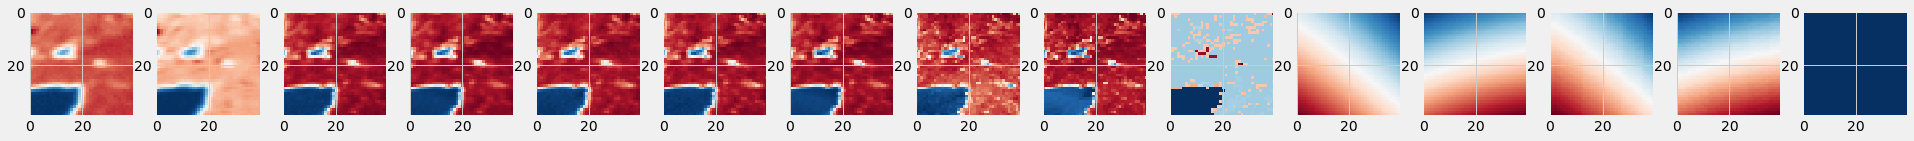

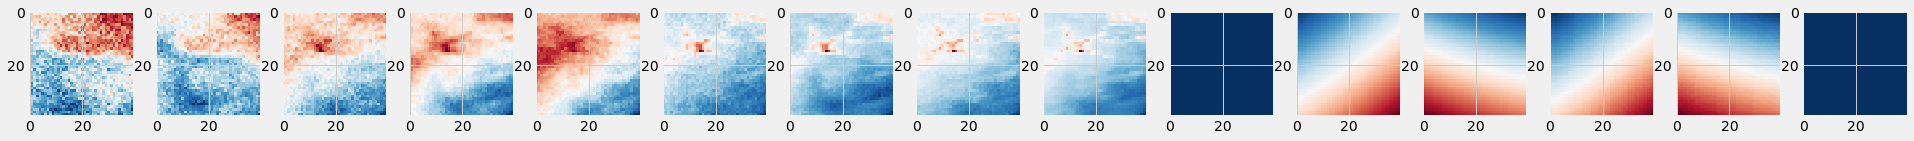

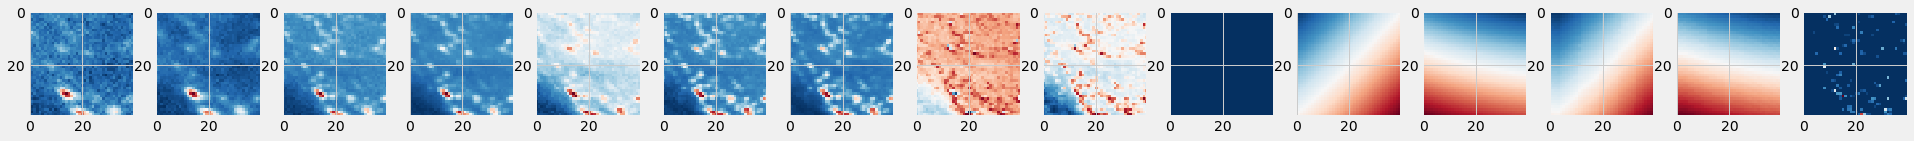

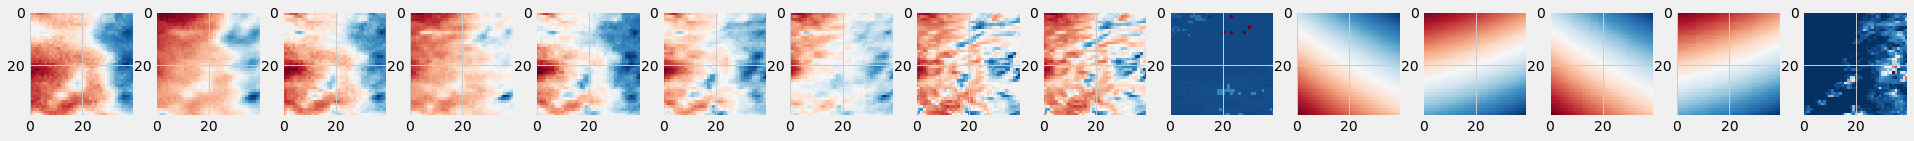

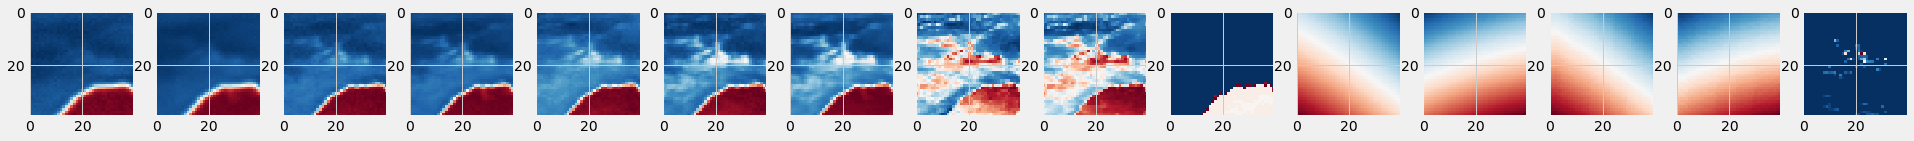

In [9]:
visual(np.random.choice(range(len(data)), 10))

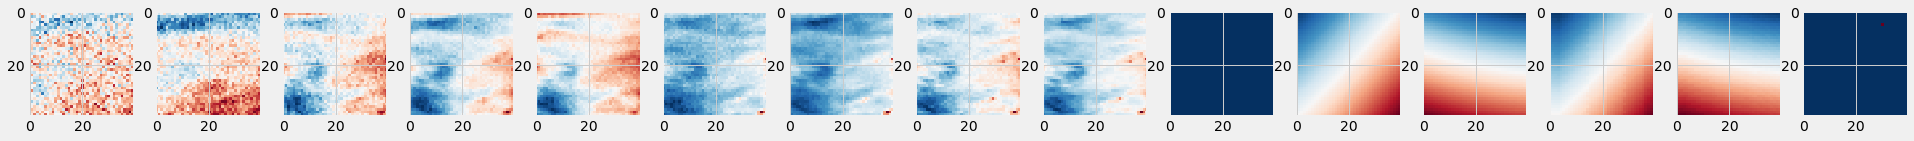

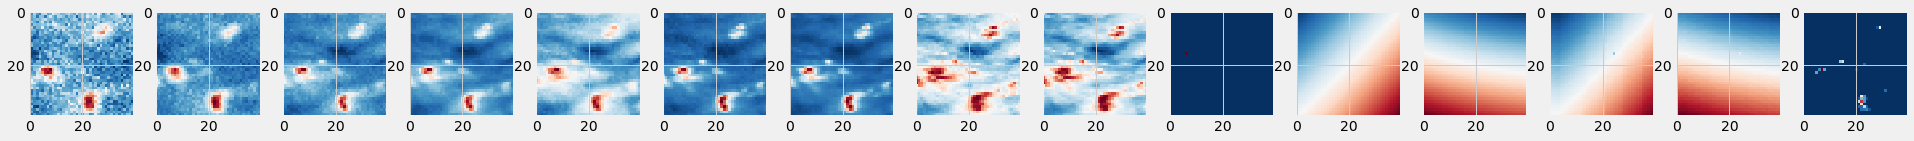

In [10]:
visual([0, 1])

In [6]:
lower_value = list()
upper_value = list()

for i in range(data.shape[0]):
    cal = (data[i, :, :, 14] < 0).sum()
    
    if cal == 0:
        continue

    if cal < 850:
        lower_value.append(i)
    else:
        upper_value.append(i)

print(len(lower_value))
print(len(upper_value))

43
68


In [8]:
def visual_value(lower_value):
    figsize=(15, 15)
    size = len(lower_value)

    plt.style.use('fivethirtyeight')

    for i, v in enumerate(lower_value[:2], 1):
        origin = data[v, :, :, 14]
        fake = np.where(origin < 0, 0, origin)

        plt.figure(figsize=figsize)
        for i in range(9):
            plt.subplot(size, 11, i + 1)
            plt.imshow(data[v, :, :, i], cmap=color_map)
        
        plt.subplot(size, 11, 10)
        plt.imshow(origin, cmap=color_map)
        plt.subplot(size, 11, 11)
        plt.imshow(fake, cmap=color_map)
    
    print(*lower_value)

    plt.show()

902


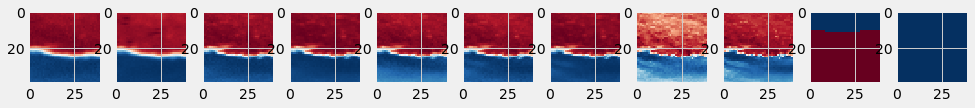

11070


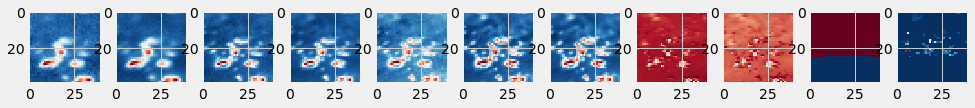

17545


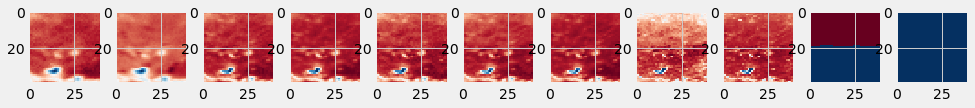

19071


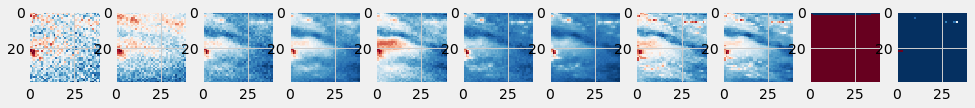

19599


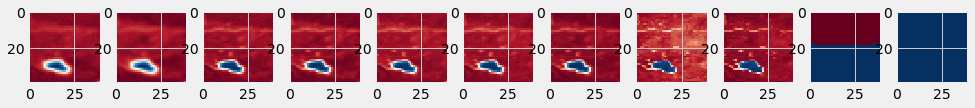

21008


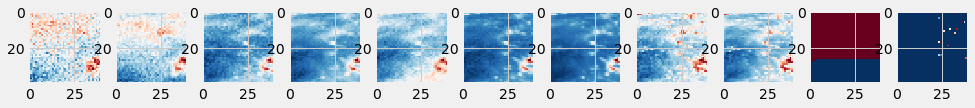

22314


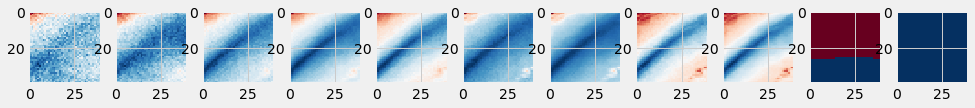

26086


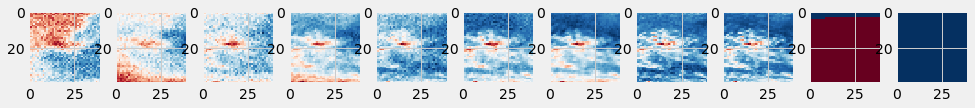

33530


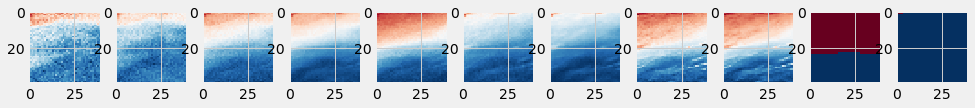

35047


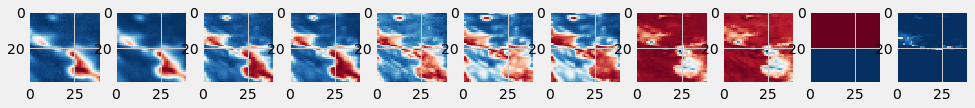

40413


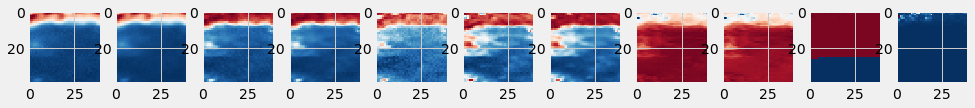

45640


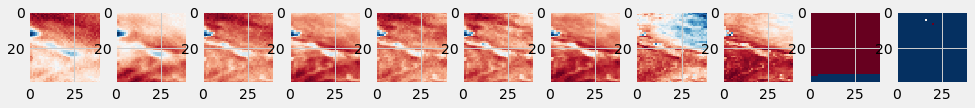

46686


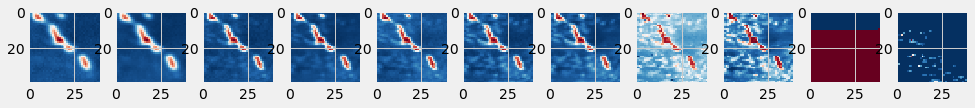

49850


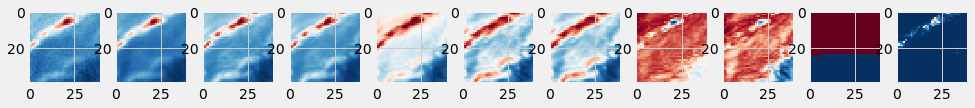

55176


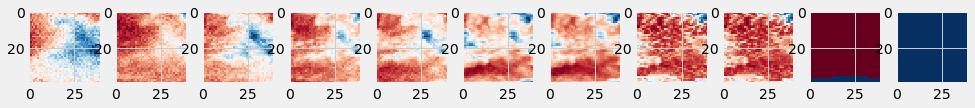

61238


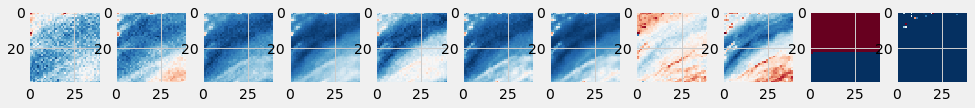

61987


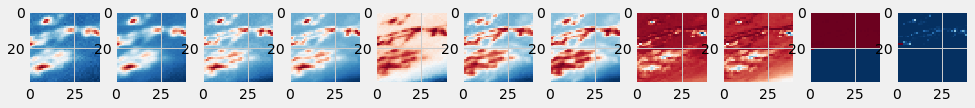

62537


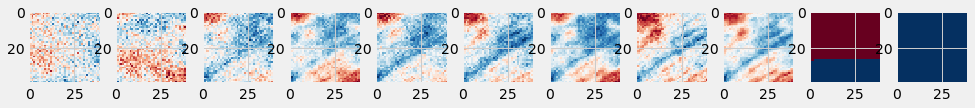

64453


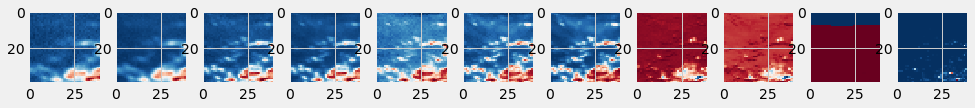

72365


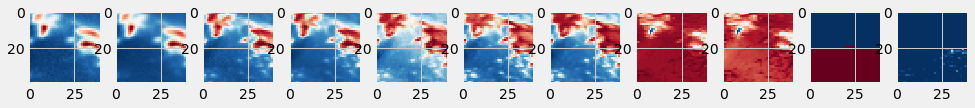

73211


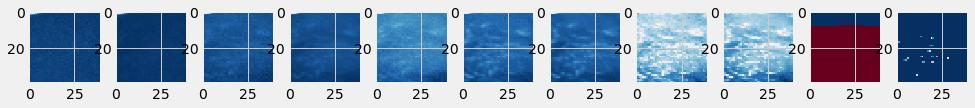

74096


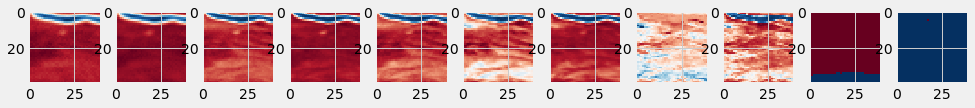

In [9]:
for i in range(0, len(lower_value), 2):
    visual_value(lower_value[i:i+1])